# Coronavirus Global Cases Vizualisations
----

### Importing Libraries

In [1]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")
print('Modules are imported.')

Modules are imported.


### Importing the Dataset

In [2]:
#Importing daily time series summary tables, including confirmed, deaths and recovered. All data is read in from the daily case report.
#Confirmed: Counts include confirmed and probable (where reported).
#Deaths: Counts include confirmed and probable (where reported).
#Recovered: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. 

In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


#### Check the shape of the dataframes

In [5]:
print (confirmed_df.shape)
print (deaths_df.shape)
print (recoveries_df.shape)

(271, 342)
(271, 342)
(256, 342)


In [6]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


In [7]:
### Replace NaN values by 0
confirmed_df.fillna(0, inplace=True)
deaths_df.fillna(0, inplace=True)
recoveries_df.fillna(0, inplace=True)

In [8]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [9]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[3]:cols[-1]]
deaths = deaths_df.loc[:, cols[3]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[3]:cols[-1]]

In [10]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [11]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [12]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [13]:
###Future forecast
days_in_future = 30
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-30]

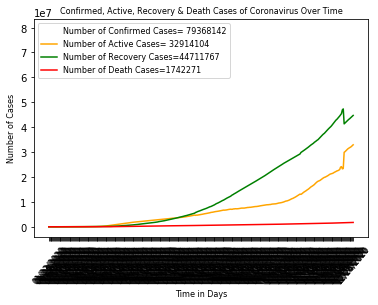

In [14]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.plot(adjusted_dates, world_cases, color='white')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Confirmed, Active, Recovery & Death Cases of Coronavirus Over Time', size=8)
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_cases_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper left', fontsize=8)
plt.xlabel('Time in Days', size=8)
plt.ylabel('Number of Cases', size=8)
plt.xticks(rotation=50, size=8)
plt.show()

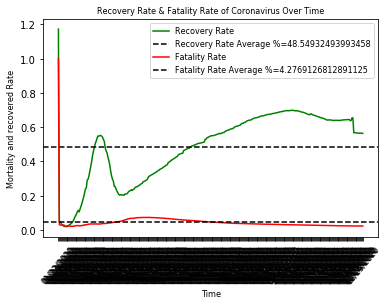

In [15]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_recovery_rate = np.mean(recovery_rate)
mean_mortality_rate = np.mean(mortality_rate)
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate & Fatality Rate of Coronavirus Over Time', size=8)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_recovery_rate*100),'Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper right', fontsize=8)
plt.xlabel('Time', size=8)
plt.ylabel('Mortality and recovered Rate', size=8)
plt.xticks(rotation=50, size=8)
plt.show()

In [16]:
# Train parameters to predict labels, use 10% for Test set
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.1, shuffle=False)

In [17]:
kernel = ['poly','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()

In [ ]:
svm_search = RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=5,verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_pred_confirmed = svm_confirmed.predict(future_forcast)

svm_search = RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=5,verbose=1)
svm_search.fit(X_train_deaths, y_train_deaths.ravel())
svm_search.best_params_
svm_deaths = svm_search.best_estimator_
svm_pred_deaths = svm_deaths.predict(future_forcast)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
plt.figure(figsize=(20, 12))

plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(future_forcast_dates, svm_pred_confirmed, linestyle='dotted', color='black')

plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(future_forcast_dates, svm_pred_deaths, linestyle='dotted', color='red')

plt.title('Predictions of Confirmed, Recovery & Death Cases of Coronavirus', size=30)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases SVM Prediction', 'Number of Death Cases', 'Death Cases SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()